In [ ]:
import mujoco as mj
import mujoco.mjx as mjx

m: mjx.Model = mj.MjModel()
# action = jax.tree.map(np.array, self._env.sys.actuator.ctrl_range)

m.actuator_ctrlrange

In [3]:

import jax.numpy as jp

qpos = jp.ones(3)
ctrl = jp.ones(3)*2

_x_ctrl_id = 0
new_ctrl = jp.zeros(3)
current_x_pos = qpos[_x_ctrl_id]
action = jp.array([0.1,0.1,0.1])

new_ctrl = new_ctrl.at[_x_ctrl_id].set(current_x_pos + action[0])


In [3]:
from mujoco_playground._src import mjx_env
import mujoco as mj
import mujoco.mjx as mjx
import jax.numpy as jp


def init() -> mj.MjModel:
    _empty_scene = """
        <mujoco>

    <option timestep="0.002"
        integrator="implicitfast"
        solver="Newton"
        gravity="0 0 -9.82"
        cone="elliptic"
        iterations="1" 
        ls_iterations="1"
    >
        <flag contact="disable" eulerdamp="disable" />
    </option>

            <worldbody>
                <body name="agent" gravcomp="1">
                    <joint name="x" type="slide" axis="1 0 0" range="-1 1"/>
                    <joint name="y" type="slide" axis="0 1 0" range="-1 1"/>
                    <joint name="z" type="slide" axis="0 0 1" range="-1 1"/>
                    <geom name="agent" type="box" size="0.01 0.01 0.01" contype="0" conaffinity="0"/>
                </body>
            </worldbody>
            <actuator>
                <position name="x" joint="x" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
                <position name="y" joint="y" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
                <position name="z" joint="z" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
            </actuator>
        </mujoco>
        """
    scene = mj.MjSpec.from_string(_empty_scene)
    m = scene.compile()
    return m



m = init()
mjx_model = mjx.put_model(m)

qvel = jp.zeros(mjx_model.nv)
qpos = jp.zeros(mjx_model.nq)

data = mjx_env.init(mjx_model, qpos=qpos, qvel=qvel)


TypeError: Indexer must have integer or boolean type, got indexer with type float32 at position 0, indexer value []

In [7]:
from mujoco_playground._src import mjx_env
import mujoco as mj
import mujoco.mjx as mjx
import jax.numpy as jp


def init() -> mj.MjModel:
    _empty_scene = """
        <mujoco>

        <option iterations="1" ls_iterations="5" timestep="0.004" integrator="implicitfast">
            <flag eulerdamp="disable"/>
        </option>

            <worldbody>
                <body name="agent" gravcomp="1">
                    <joint name="x" type="slide" axis="1 0 0" range="-1 1"/>
                    <joint name="y" type="slide" axis="0 1 0" range="-1 1"/>
                    <joint name="z" type="slide" axis="0 0 1" range="-1 1"/>
                    <geom name="agent" type="box" size="0.01 0.01 0.01" contype="0" conaffinity="0"/>
                </body>
            </worldbody>
            <actuator>
                <position name="x" joint="x" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
                <position name="y" joint="y" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
                <position name="z" joint="z" ctrlrange="-1 1" kp="10" kv="100" ctrllimited="true"/>
            </actuator>
        </mujoco>
        """
    scene = mj.MjSpec.from_string(_empty_scene)
    m = scene.compile()
    return m


m = init()
mjx_model = mjx.put_model(m)

qvel = jp.zeros(mjx_model.nv)
qpos = jp.zeros(mjx_model.nq)
action = jp.zeros(mjx_model.nu)

data = mjx_env.init(mjx_model, qpos=qpos, qvel=qvel)


data = mjx_env.step(mjx_model, data, action, 1)



0.1027642116013682 -0.6483067919546815 0.1982229372069784


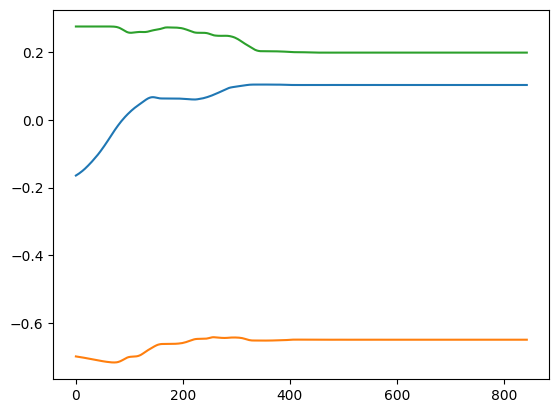

In [ ]:

import json
import matplotlib.pyplot as plt
import numpy as np

with open("data/21_08_2025_13_11_50_robot_B_data.json") as f:
    data = json.load(f)

states = np.array(data["states"])
x = states[:,0]
y = states[:,1]
z = states[:,2]

plt.plot(x)
plt.plot(y)
plt.plot(z)


print(x[-1], y[-1], z[-1])


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Create output directory if it doesn't exist
output_dir = "data/norm_data"
os.makedirs(output_dir, exist_ok=True)

# Get all JSON files in the data directory
data_files = glob.glob("data/*.json")

for file_path in data_files:
    # Skip files in the norm_data directory to avoid processing already normalized files
    if "norm_data" in file_path:
        continue

    with open(file_path) as f:
        data = json.load(f)

    states = np.array(data["states"])
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]

    # Calculate the offset needed to make the last point (0,0,0)
    x_offset = x[-1]
    y_offset = y[-1]
    z_offset = z[-1]

    # Normalize the data by subtracting the final values
    x_norm = x - x_offset
    y_norm = y - y_offset
    z_norm = z - z_offset

    # Create new normalized states array
    states_norm = np.column_stack((x_norm, y_norm, z_norm))

    # Create new data dictionary with normalized states
    data_norm = data.copy()
    data_norm["states"] = states_norm.tolist()

    # Generate output filename
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_dir, filename)

    # Save normalized data
    with open(output_path, "w") as f:
        json.dump(data_norm, f, indent=2)

    print(
        f"Processed {filename}: original end ({x[-1]:.3f}, {y[-1]:.3f}, {z[-1]:.3f}) -> normalized end ({x_norm[-1]:.3f}, {y_norm[-1]:.3f}, {z_norm[-1]:.3f})"
    )

print("\nAll files normalized and saved to data/norm_data/")


Processed 21_08_2025_13_18_26_robot_B_data.json: original end (0.096, -0.652, 0.194) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_16_01_robot_B_data.json: original end (0.099, -0.635, 0.192) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_20_12_robot_B_data.json: original end (0.105, -0.648, 0.193) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_13_38_robot_B_data.json: original end (0.090, -0.657, 0.192) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_21_37_robot_B_data.json: original end (0.097, -0.639, 0.197) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_12_57_robot_B_data.json: original end (0.089, -0.646, 0.199) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_19_46_robot_B_data.json: original end (0.087, -0.644, 0.195) -> normalized end (0.000, 0.000, 0.000)
Processed 21_08_2025_13_22_34_robot_B_data.json: original end (0.095, -0.659, 0.199) -> normalized end (0.000, 0.000, 0.000)



All files normalized and saved to data/norm_data/


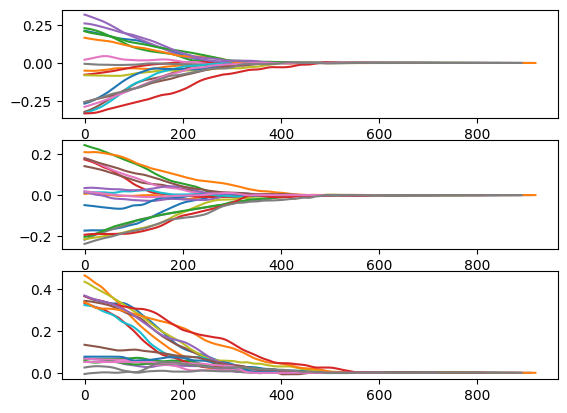

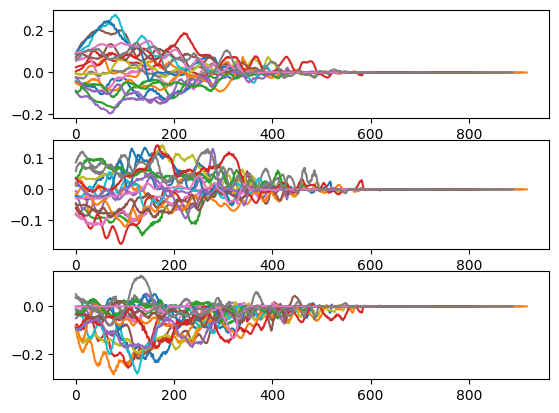

In [ ]:


import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


fig, ax = plt.subplots(3)
fig2, ax2 = plt.subplots(3)

# Get all JSON files in the data directory
data_files = glob.glob("data/norm_data/*.json")

for file_path in data_files:

    with open(file_path) as f:
        data = json.load(f)

    states = np.array(data["states"])
    actions = np.array(data["actions"])
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]
    x2 = actions[:, 0]
    y2 = actions[:, 1]
    z2 = actions[:, 2]

    ax[0].plot(x)
    ax[1].plot(y)
    ax[2].plot(z)

    ax2[0].plot(x2)
    ax2[1].plot(y2)
    ax2[2].plot(z2)





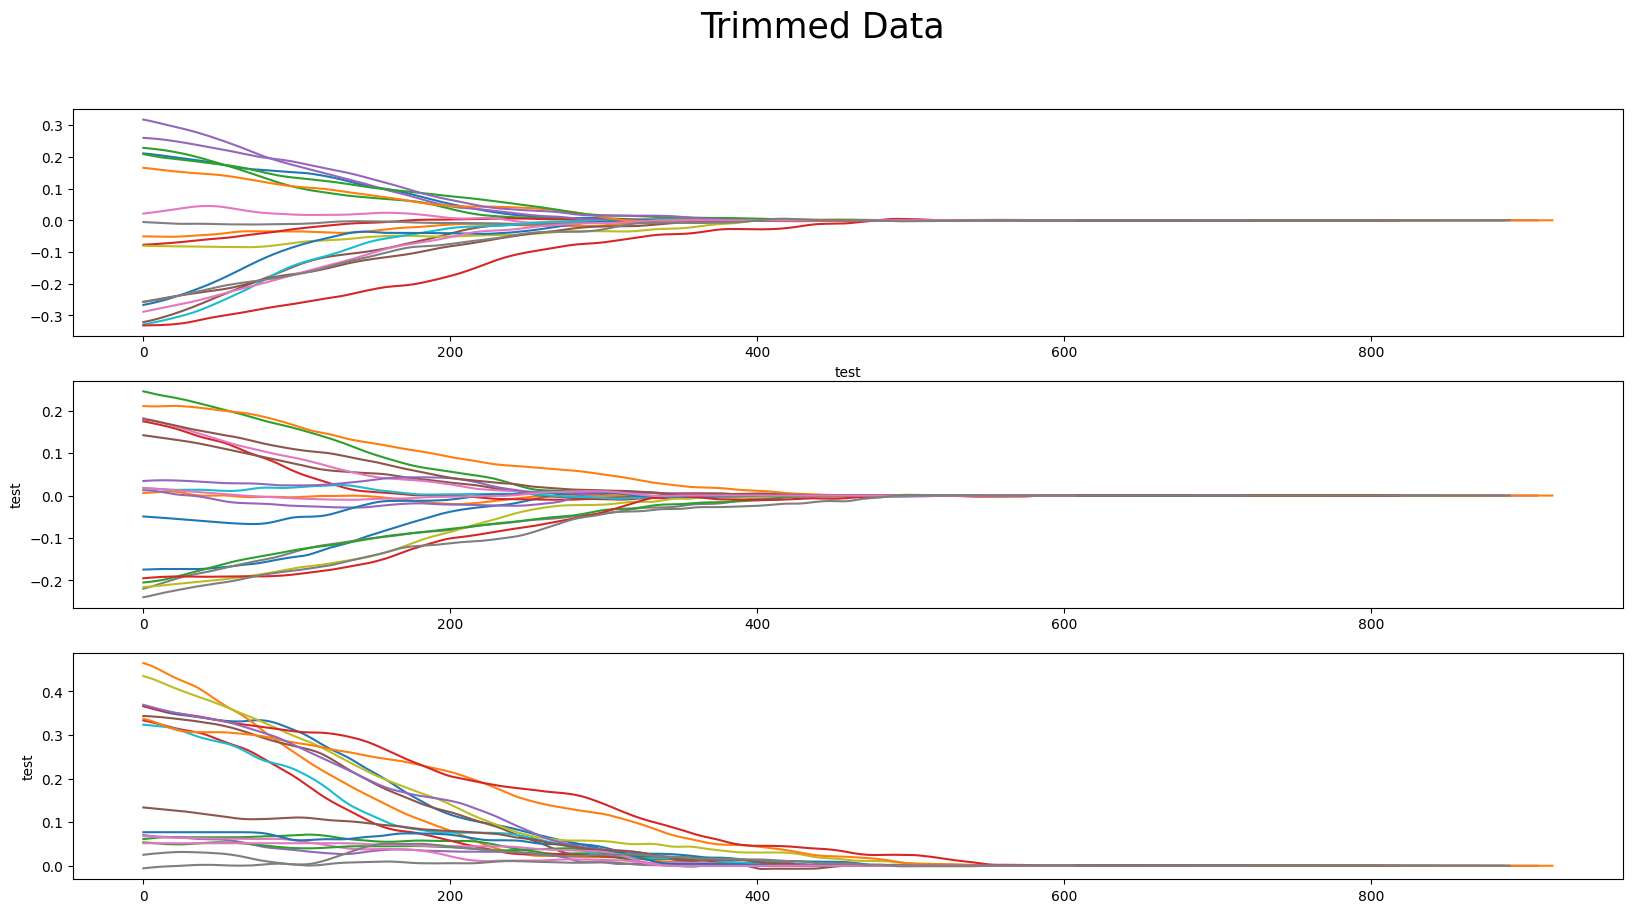

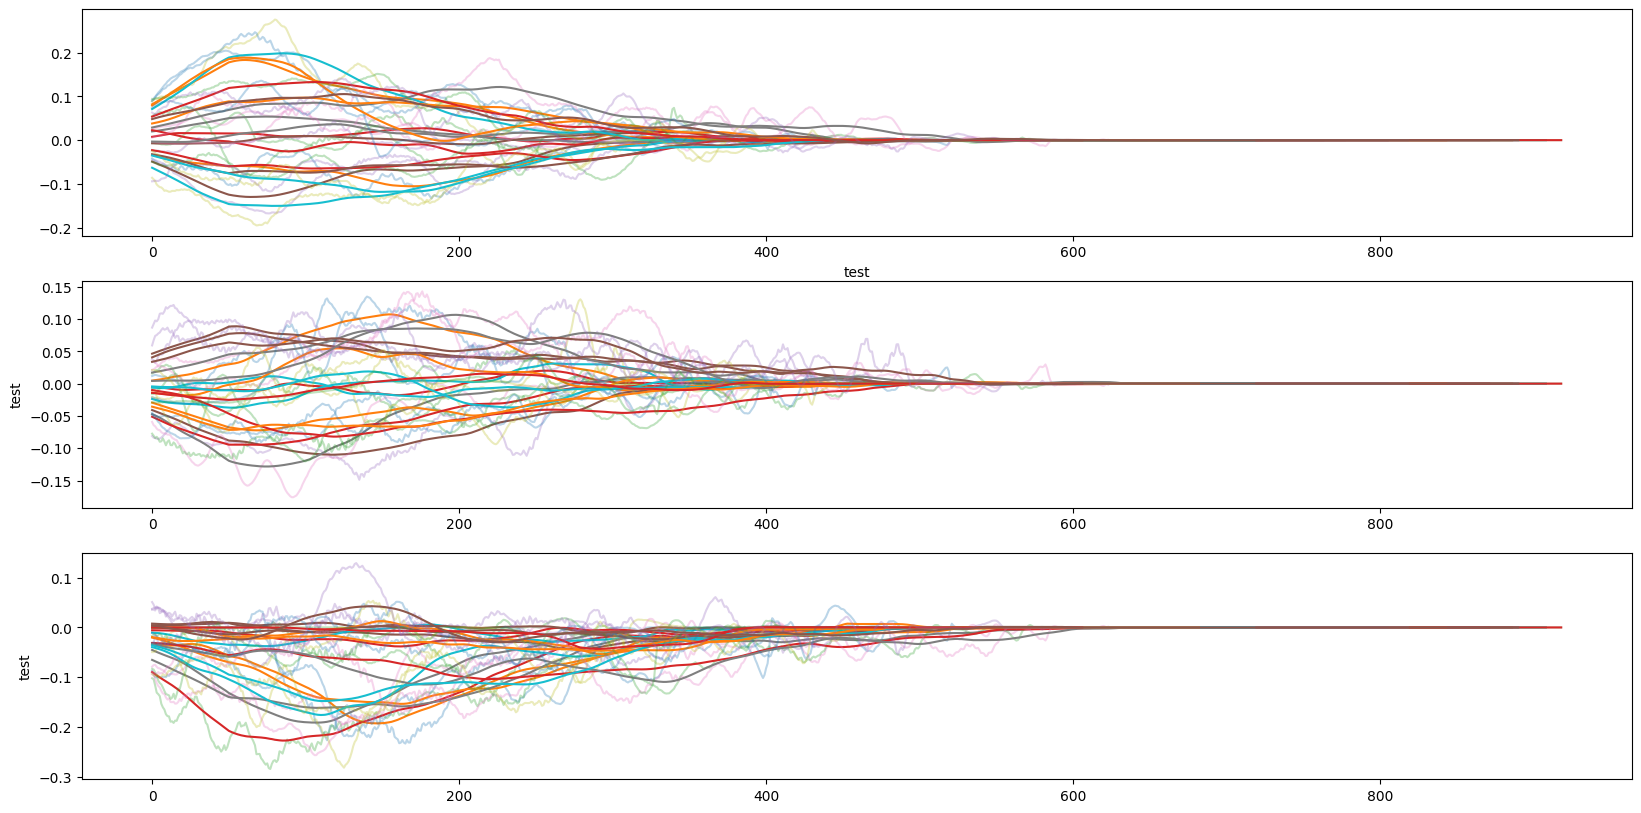

All files processed and saved to data/norm_smooth_data_test_2/


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy import signal


def low_pass_filter(data, window_size=5):
    """Apply simple moving average filter"""
    if len(data) < window_size:
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode="same")


# Create output directory if it doesn't exist
output_dir = "data/norm_smooth_data_test_2"
os.makedirs(output_dir, exist_ok=True)

fig, ax = plt.subplots(3, figsize=(20, 10))
fig2, ax2 = plt.subplots(3, figsize=(20, 10))

# Get all JSON files in the data directory
data_files = glob.glob("data/norm_data/*.json")

for file_path in data_files:
    with open(file_path) as f:
        data = json.load(f)

    states = np.array(data["states"])
    actions = np.array(data["actions"])
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]
    x2 = actions[:, 0]
    y2 = actions[:, 1]
    z2 = actions[:, 2]

    # Apply low-pass filter to actions
    window_size = 100  # Adjust this value - larger = smoother
    x2_filtered = low_pass_filter(x2, window_size)
    y2_filtered = low_pass_filter(y2, window_size)
    z2_filtered = low_pass_filter(z2, window_size)

    # Create new actions array with filtered data
    actions_filtered = np.column_stack((x2_filtered, y2_filtered, z2_filtered))

    # Create new data dictionary with filtered actions
    data_filtered = data.copy()
    data_filtered["actions"] = actions_filtered.tolist()

    # Generate output filename
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_dir, filename)

    # Save filtered data
    with open(output_path, "w") as f:
        json.dump(data_filtered, f, indent=2)

    ax[0].plot(x)
    ax[1].plot(y)
    ax[2].plot(z)

    # Plot both original and filtered actions
    ax2[0].plot(x2, alpha=0.3, label="Original")
    ax2[0].plot(x2_filtered, label="Filtered")
    ax2[1].plot(y2, alpha=0.3, label="Original")
    ax2[1].plot(y2_filtered, label="Filtered")
    ax2[2].plot(z2, alpha=0.3, label="Original")
    ax2[2].plot(z2_filtered, label="Filtered")

fig.suptitle("Trimmed Data", fontsize=25)

ax[0].set_xlabel("test")
ax[1].set_ylabel("test")
ax[2].set_ylabel("test")

ax2[0].set_xlabel("test")
ax2[1].set_ylabel("test")
ax2[2].set_ylabel("test")

# ax2[0].legend()
# ax2[1].legend()
# ax2[2].legend()
# plt.tight_layout()
plt.show()

print(f"All files processed and saved to {output_dir}/")


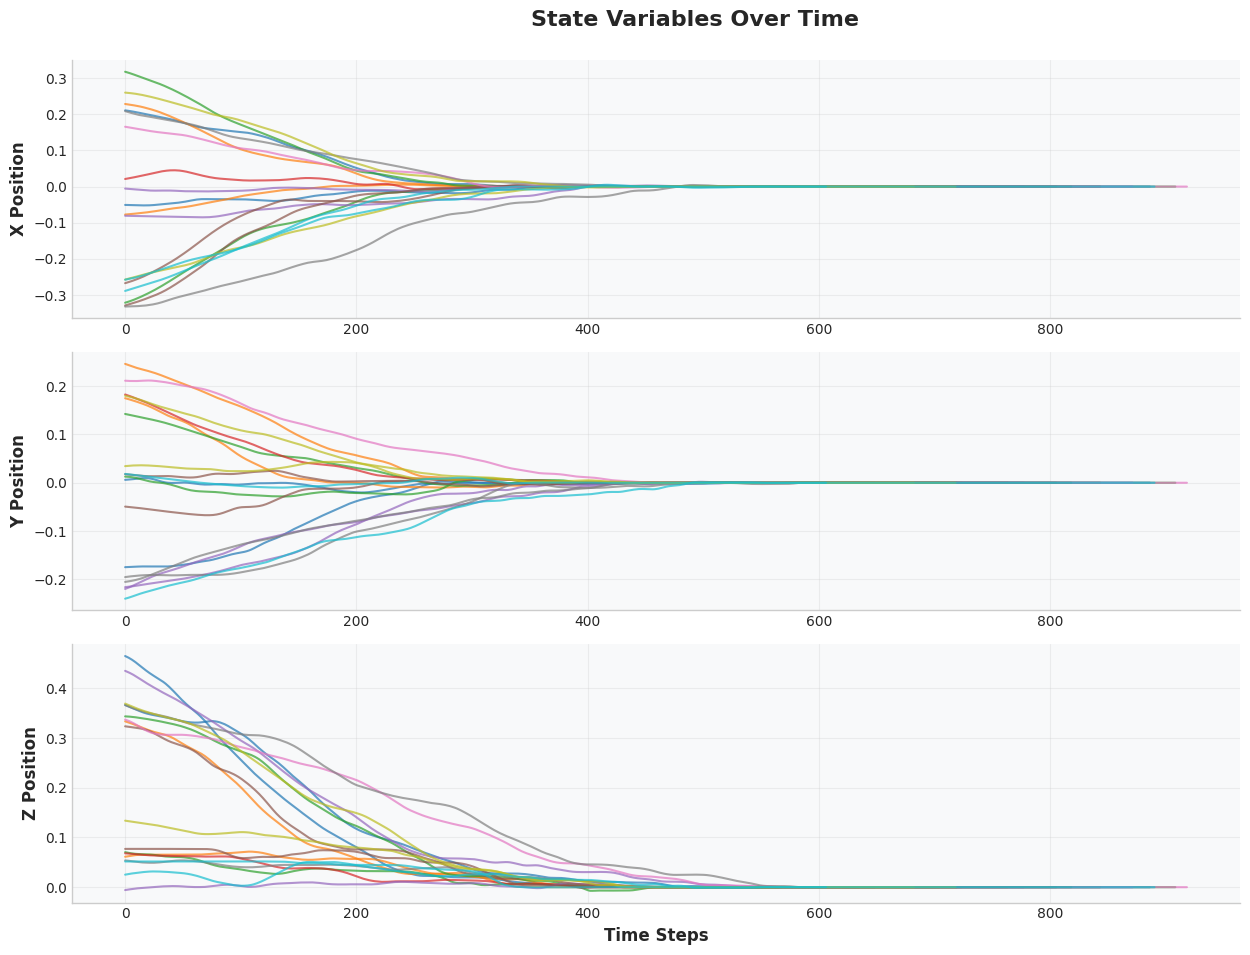

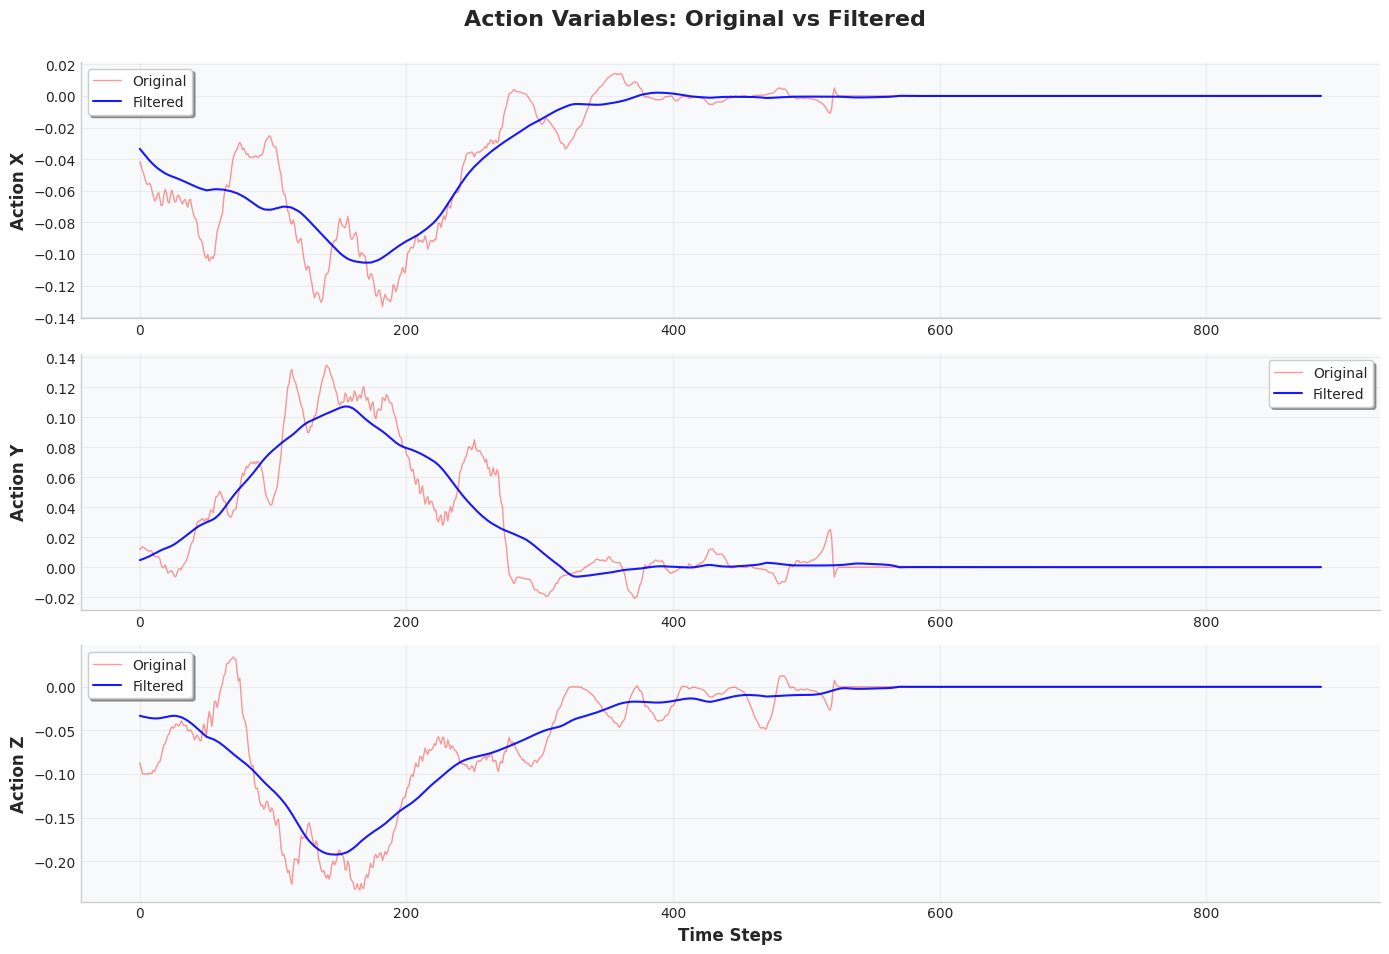

All files processed and saved to data/norm_smooth_data_test/
Processed 18 files


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy import signal

# Set professional style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"


def low_pass_filter(data, window_size=5):
    """Apply simple moving average filter"""
    if len(data) < window_size:
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode="same")
# def set_pre_extremum_to_extremum(data):
#     """Set values before extremum to the extremum value"""
#     # Find the index of maximum absolute value (extremum)
#     extremum_idx = np.argmax(np.abs(data))
#     extremum_value = data[extremum_idx]

#     # Create a copy of the data
#     result = data.copy()

#     # Set all values before the extremum to the extremum value
#     result[:extremum_idx] = extremum_value
#     result[0] = extremum_value

#     return result

# Create output directory if it doesn't exist
output_dir = "data/raw"
output_dir = "data/norm_smooth_data_test"
os.makedirs(output_dir, exist_ok=True)

# Create figures with better layout
fig, ax = plt.subplots(3, 1, figsize=(14, 10))
fig2, ax2 = plt.subplots(3, 1, figsize=(14, 10))

# Get all JSON files in the data directory
data_files = glob.glob("data/norm_data/*.json")

# Define colors for different files
colors = plt.cm.tab10(np.linspace(0, 1, len(data_files)))

for i, file_path in enumerate(data_files):
    with open(file_path) as f:
        data = json.load(f)

    states = np.array(data["states"])
    actions = np.array(data["actions"])
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]
    x2 = actions[:, 0]
    y2 = actions[:, 1]
    z2 = actions[:, 2]

    # Apply pre-extremum modification to actions
    # x2 = set_pre_extremum_to_extremum(x2)
    # y2 = set_pre_extremum_to_extremum(y2)
    # z2 = set_pre_extremum_to_extremum(z2)

    # Apply low-pass filter to actions
    window_size = 100
    # window_size = 100

    # x_filtered = low_pass_filter(x, 1)
    # y_filtered = low_pass_filter(y, 1)
    # z_filtered = low_pass_filter(z, 1)

    x2_filtered = low_pass_filter(x2, window_size)
    y2_filtered = low_pass_filter(y2, window_size)
    z2_filtered = low_pass_filter(z2, window_size)

    # Create new actions array with filtered data
    actions_filtered = np.column_stack((x2, y2, z2))
    # actions_filtered = np.column_stack((x2_filtered, y2_filtered, z2_filtered))
    # Create new states array with filtered data
    states_filtered = np.column_stack((x2_filtered, y2_filtered, z2_filtered))

    # Create new data dictionary with filtered actions
    data_filtered = data.copy()
    data_filtered["actions"] = actions_filtered.tolist()
    data_filtered["states"] = states_filtered.tolist()

    # Generate output filename
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_dir, filename)

    # Save filtered data
    with open(output_path, "w") as f:
        json.dump(data_filtered, f, indent=2)

    # Get filename for legend (without extension)
    label = os.path.splitext(filename)[0]

    # Plot states with different colors for each file
    # ax[0].plot(x_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)
    # ax[1].plot(y_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)
    # ax[2].plot(z_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)

    # Plot actions - only for first file to avoid clutter
    if i == 0:
        ax2[0].plot(x2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[0].plot(
            x2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )
        ax2[1].plot(y2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[1].plot(
            y2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )
        ax2[2].plot(z2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[2].plot(
            z2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )

# Style the first figure (States)
fig.suptitle("State Variables Over Time", fontsize=16, fontweight="bold", y=0.95)

ax[0].set_ylabel("X Position", fontsize=12, fontweight="bold")
ax[1].set_ylabel("Y Position", fontsize=12, fontweight="bold")
ax[2].set_ylabel("Z Position", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Time Steps", fontsize=12, fontweight="bold")

for axis in ax:
    axis.grid(True, alpha=0.3)
    axis.set_facecolor("#f8f9fa")
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

# Add legend to first subplot only to avoid repetition
# ax[0].legend(
#     bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, frameon=True
# )

# Style the second figure (Actions)
fig2.suptitle(
    "Action Variables: Original vs Filtered", fontsize=16, fontweight="bold", y=0.95
)

ax2[0].set_ylabel("Action X", fontsize=12, fontweight="bold")
ax2[1].set_ylabel("Action Y", fontsize=12, fontweight="bold")
ax2[2].set_ylabel("Action Z", fontsize=12, fontweight="bold")
ax2[2].set_xlabel("Time Steps", fontsize=12, fontweight="bold")

for axis in ax2:
    axis.grid(True, alpha=0.3)
    axis.set_facecolor("#f8f9fa")
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.legend(frameon=True, fancybox=True, shadow=True)

# Adjust layout
plt.tight_layout()
fig.tight_layout(rect=[0, 0, 0.9, 0.95])  # Make room for legend
fig2.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

print(f"All files processed and saved to {output_dir}/")
print(f"Processed {len(data_files)} files")

# fig.savefig("my_plots/o.png")
# fig2.savefig("my_plots/a.png")


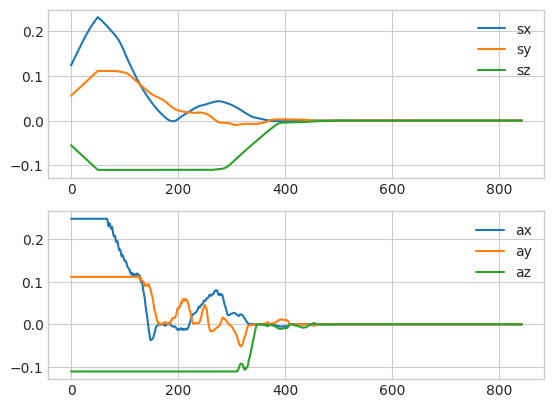

In [34]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy import signal

# Set professional style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"

with open("data/raw/21_08_2025_13_11_50_robot_B_data.json", "r") as f:
    data = json.load(f)

states = np.array(data["states"])
actions = np.array(data["actions"])

fig, (ax0, ax1) = plt.subplots(2)

sx = states[:, 0]
sy = states[:, 1]
sz = states[:, 2]

ax = actions[:, 0]
ay = actions[:, 1]
az = actions[:, 2]


ax0.plot(sx, label="sx")
ax0.plot(sy, label="sy")
ax0.plot(sz, label="sz")

ax1.plot(ax, label="ax")
ax1.plot(ay, label="ay")
ax1.plot(az, label="az")

ax0.legend()
ax1.legend()


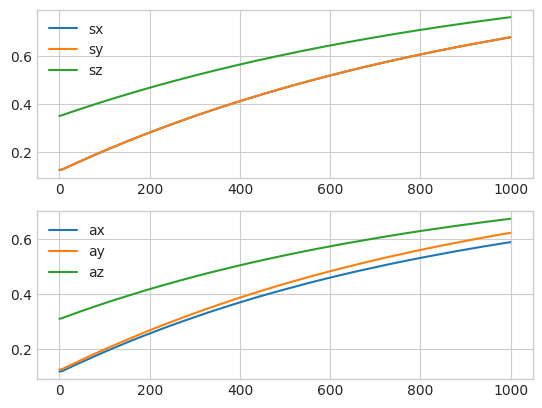

In [37]:

import json
import matplotlib.pyplot as plt
import numpy as np

with open("data/tmp/data.json") as f:
# with open("data/tmp/data.json") as f:
    data:dict = json.load(f)

states = np.array(data["states"])
actions = np.array(data["actions"])

fig, (ax0, ax1) = plt.subplots(2)

sx = states[:,0,0]
sy = states[:,0,1]
sz = states[:,0,2]

ax = actions[:,0,0]
ay = actions[:,0,1]
az = actions[:,0,2]


ax0.plot(sx, label="sx")
ax0.plot(sy, label="sy")
ax0.plot(sz, label="sz")

ax1.plot(ax, label="ax")
ax1.plot(ay, label="ay")
ax1.plot(az, label="az")

ax0.legend()
ax1.legend()



In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy import signal

# Set professional style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"


def low_pass_filter(data, window_size=5):
    """Apply simple moving average filter"""
    if len(data) < window_size:
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode="same")

# Create output directory if it doesn't exist

output_dir = "data/test"

os.makedirs(output_dir, exist_ok=True)

# Create figures with better layout
fig, ax = plt.subplots(3, 1, figsize=(14, 10))
fig2, ax2 = plt.subplots(3, 1, figsize=(14, 10))

# Get all JSON files in the data directory
data_files = glob.glob("data/norm_data/*.json")

# Define colors for different files
colors = plt.cm.tab10(np.linspace(0, 1, len(data_files)))

for i, file_path in enumerate(data_files):
    with open(file_path) as f:
        data = json.load(f)

    states = np.array(data["states"])
    actions = np.array(data["actions"])
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]
    x2 = actions[:, 0]
    y2 = actions[:, 1]
    z2 = actions[:, 2]

    # Apply pre-extremum modification to actions
    # x2 = set_pre_extremum_to_extremum(x2)
    # y2 = set_pre_extremum_to_extremum(y2)
    # z2 = set_pre_extremum_to_extremum(z2)

    # Apply low-pass filter to actions
    window_size = 100
    # window_size = 100

    # x_filtered = low_pass_filter(x, 1)
    # y_filtered = low_pass_filter(y, 1)
    # z_filtered = low_pass_filter(z, 1)

    x2_filtered = low_pass_filter(x2, window_size)
    y2_filtered = low_pass_filter(y2, window_size)
    z2_filtered = low_pass_filter(z2, window_size)

    # Create new actions array with filtered data
    actions_filtered = np.column_stack((x2, y2, z2))
    # actions_filtered = np.column_stack((x2_filtered, y2_filtered, z2_filtered))
    # Create new states array with filtered data
    states_filtered = np.column_stack((x2_filtered, y2_filtered, z2_filtered))

    # Create new data dictionary with filtered actions
    data_filtered = data.copy()
    data_filtered["actions"] = actions_filtered.tolist()
    data_filtered["states"] = states_filtered.tolist()

    # Generate output filename
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_dir, filename)

    # Save filtered data
    with open(output_path, "w") as f:
        json.dump(data_filtered, f, indent=2)

    # Get filename for legend (without extension)
    label = os.path.splitext(filename)[0]

    # Plot states with different colors for each file
    # ax[0].plot(x_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)
    # ax[1].plot(y_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)
    # ax[2].plot(z_filtered, color=colors[i], alpha=0.7, linewidth=1.5, label=label)

    # Plot actions - only for first file to avoid clutter
    if i == 0:
        ax2[0].plot(x2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[0].plot(
            x2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )
        ax2[1].plot(y2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[1].plot(
            y2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )
        ax2[2].plot(z2, alpha=0.4, linewidth=1, color="red", label="Original")
        ax2[2].plot(
            z2_filtered, alpha=0.9, linewidth=1.5, color="blue", label="Filtered"
        )

# Style the first figure (States)
fig.suptitle("State Variables Over Time", fontsize=16, fontweight="bold", y=0.95)

ax[0].set_ylabel("X Position", fontsize=12, fontweight="bold")
ax[1].set_ylabel("Y Position", fontsize=12, fontweight="bold")
ax[2].set_ylabel("Z Position", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Time Steps", fontsize=12, fontweight="bold")

for axis in ax:
    axis.grid(True, alpha=0.3)
    axis.set_facecolor("#f8f9fa")
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

# Add legend to first subplot only to avoid repetition
# ax[0].legend(
#     bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, frameon=True
# )

# Style the second figure (Actions)
fig2.suptitle(
    "Action Variables: Original vs Filtered", fontsize=16, fontweight="bold", y=0.95
)

ax2[0].set_ylabel("Action X", fontsize=12, fontweight="bold")
ax2[1].set_ylabel("Action Y", fontsize=12, fontweight="bold")
ax2[2].set_ylabel("Action Z", fontsize=12, fontweight="bold")
ax2[2].set_xlabel("Time Steps", fontsize=12, fontweight="bold")

for axis in ax2:
    axis.grid(True, alpha=0.3)
    axis.set_facecolor("#f8f9fa")
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.legend(frameon=True, fancybox=True, shadow=True)

# Adjust layout
plt.tight_layout()
fig.tight_layout(rect=[0, 0, 0.9, 0.95])  # Make room for legend
fig2.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

print(f"All files processed and saved to {output_dir}/")
print(f"Processed {len(data_files)} files")

# fig.savefig("my_plots/o.png")
# fig2.savefig("my_plots/a.png")
